In [ ]:
import torch
import fastai

print(torch.__version__)
print(fastai.__version__)

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c pnevmoniya

In [ ]:
!ls

In [ ]:
from zipfile import ZipFile
dataset = "/content/pnevmoniya.zip"

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [77]:
from fastai.vision.all import *
from ipywidgets import widgets

#path
path = Path('train')

db = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.05, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)

dls = db.dataloaders(path)
# dls.train.show_batch(max_n=32, nrows=4)

#training
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(6)

epoch,train_loss,valid_loss,accuracy,time
0,0.438182,0.111635,0.953846,01:49


epoch,train_loss,valid_loss,accuracy,time
0,0.121097,0.137476,0.961538,01:41
1,0.099717,0.087132,0.969231,01:38
2,0.058904,0.083463,0.973077,01:39
3,0.040754,0.054272,0.980769,01:41
4,0.026692,0.033702,0.988462,01:38
5,0.013618,0.025655,0.992308,01:39


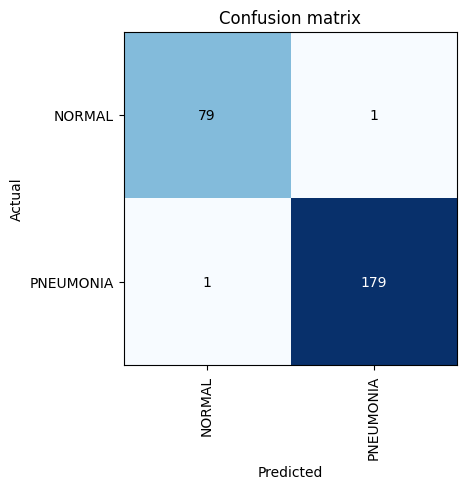

In [78]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

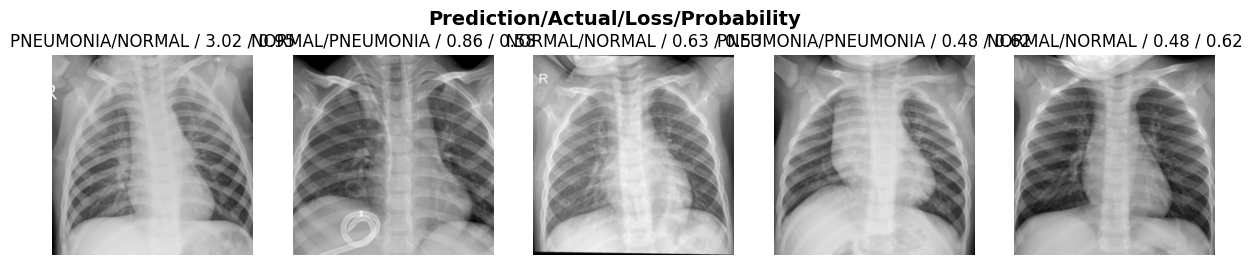

In [79]:
interp.plot_top_losses(5, nrows=1)

In [80]:
import os
from PIL import Image
import numpy as np

path = Path('test')

#create a list of all images in the test folder
images = [os.path.join(path, f) for f in os.listdir(path)]

In [81]:
predictions = []
for i in images:
  pred, pred_id, _ = learn.predict(i)
  predictions.append(pred)

In [82]:
import pandas as pd

df1 = pd.DataFrame(images)
df2 = pd.DataFrame(predictions)
df = pd.concat([df1, df2], axis=1)

In [83]:
df.to_csv('/content/predictions.csv')

In [84]:
import joblib
joblib.dump(learn, 'pnevmaniya.pkl')

['pnevmaniya.pkl']